# El "bias" (sesgo/intercepto)
En las redes neuronales el "bias" es el intercepto. Sin "bias" es como pensar que la solucion (funcion) pasa por el origen y esto es muy limitado.

La Figura 3.69. Muestra un ejemplo de esto.

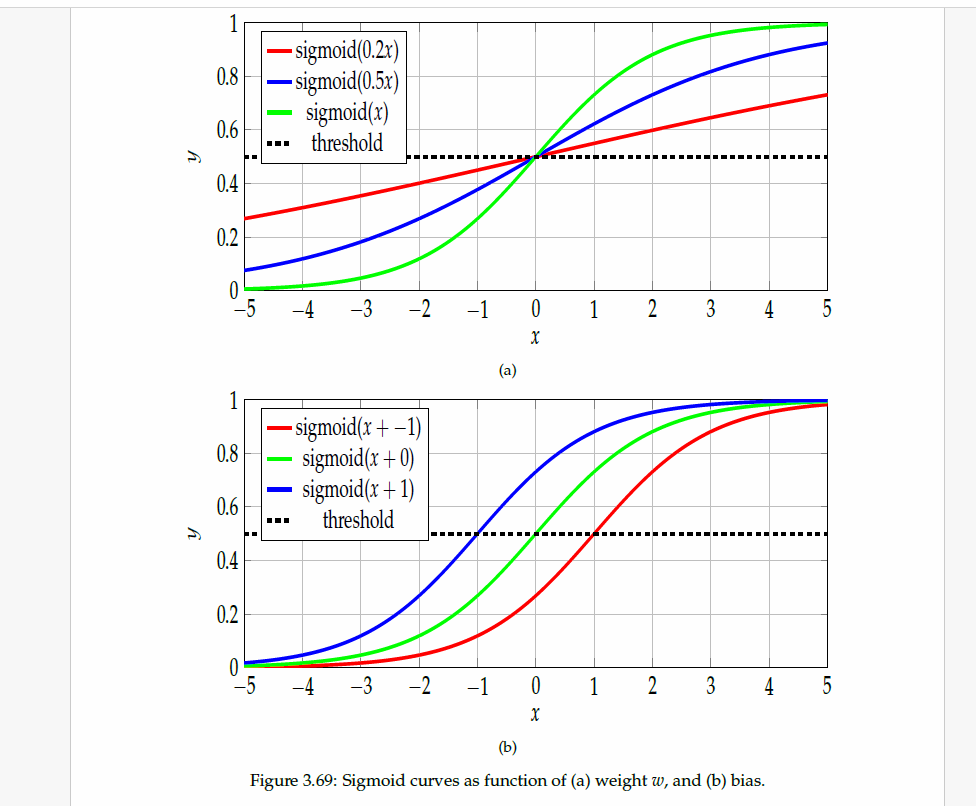

El bias es el nodo amarillo que hemos mostrado en las redes.

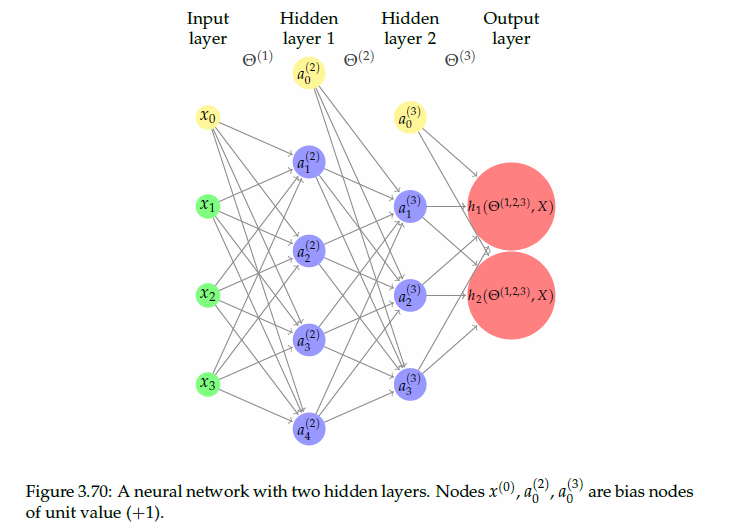

Veamos el algoritmo de la propagacion hacia adelante como lo discutimos en la clase anterior.

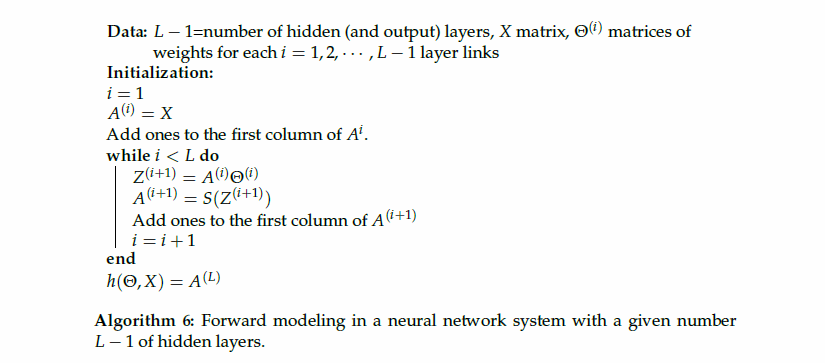

Revisemos el problema del XOR:


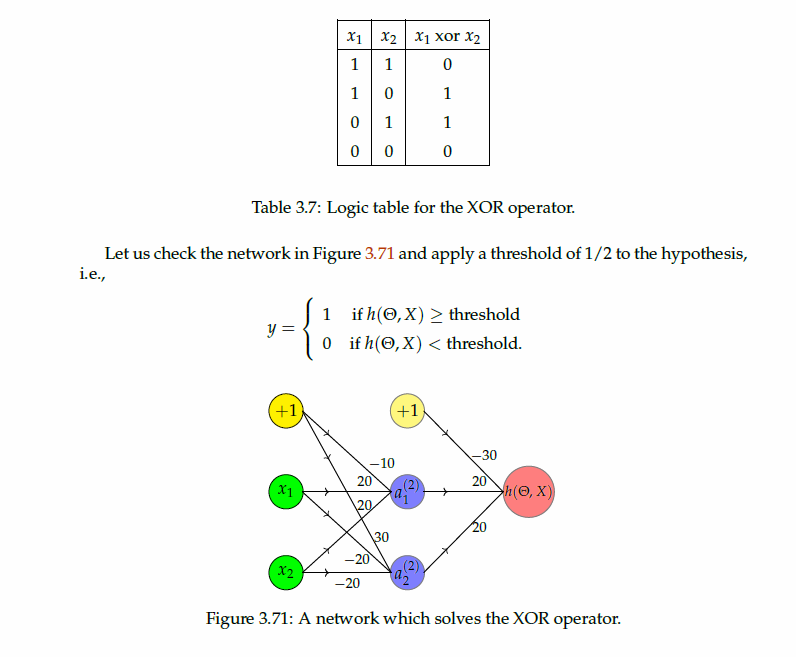

La notacion es importante. Veamos la Figura 3.72

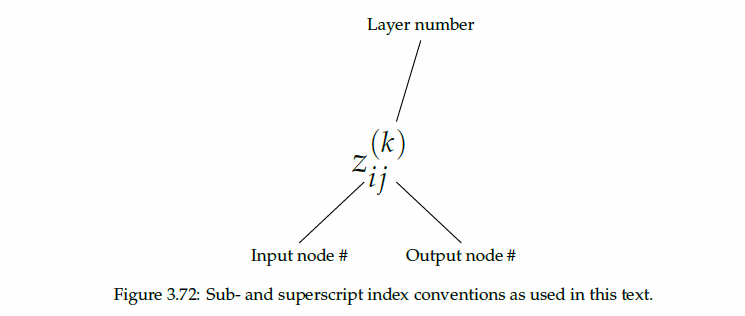

Vamos solo a propagar el primer dato $(x_1, x_2)=(1,1)$ los demas los dejo como tarea.

Para $(x_1, x_2)=(1,1)$.

* Capa 2
$$z_{11}^{(2)} = -10 + 20 x_1 + 20 x_2 = 30 $$
$$a_{11}^{(2)} = S(z_{12}^{(2)}) = \frac{1}{1 + \mathrm{e}^{-30}} \approx 1 $$

$$z_{12}^{(2)} = 30 - 20 x_1 - 20 x_2 = - 10 $$
$$a_{12}^{(2)} = S(z_{12}^{(2)}) = \frac{1}{1 + \mathrm{e}^{10}} =0.0000454. $$

* Capa 3
$$z_{11}^{(3)} = -30 + 20 a_{11}^{(2)} + 20 a_{12}^{(2)} = -9.999902 $$
$$a_{11}^{(3)} = S(z_{11}^{(3)})  \approx 0.0000454$$


El umbral que usamos es  0.5. Es decir menor que 0.5 es 0 y mayor o igual es 1.

como $0.0000454 < 0.5$, la salida es $y=1$. Es decir
$$y = \Big |_{(1,1)} = 0  $$

Tarea revisar los otros tres pares de datos.

Veamos el problema de forma matricial.

La matriz de entrada, sumandole la columna de unos es

$$X = \begin{pmatrix}
1 & 1 & 1 \\
1 & 1 & 0 \\
1 & 0 & 1 \\
1 & 0 & 0
\end{pmatrix} $$

$$\Theta^{(1)} = \begin{pmatrix} -10 & 30 \\ 20 &- 20 \\ 20 & - 20 \end{pmatrix}  $$

$$\Theta^{(2)} = \begin{pmatrix}  -30 \\ 20  \\ 20\end{pmatrix}  $$

Programamos esto en `Python`

In [5]:
import numpy as np

# define sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# define input matrix
X = np.array([[1, 1],
              [1, 0],
              [0, 1],
              [0, 0]])

# add column of ones
ones = np.ones((X.shape[0], 1))
X = np.hstack((ones, X))
print("X=\n", X)
print()

# define weights
Theta1 = np.array( [[-10,30], [20, -20], [20, -20]])
print("Theta 1\n", Theta1)
print()

Theta2 = np.array([[-30], [20], [20]])
print("Theta 2\n", Theta2)
print()

Z1 = X.dot(Theta1)
print("Z1\n", Z1)
print()
A = sigmoid(Z1)
print("A\n", A)
print()

# agregamos unos a la matriz A
ones = np.ones((A.shape[0], 1))
A = np.hstack((ones, A))
print("A\n", A)
print()

Z2 = A.dot(Theta2)
print("Z2\n", Z2)
print()

H = sigmoid(Z2)
print("H\n",H)
print()

# creamos una variable logica booleana para verificar
B = (H > 0.5)
print("B\n", B)
print()


X=
 [[1. 1. 1.]
 [1. 1. 0.]
 [1. 0. 1.]
 [1. 0. 0.]]

Theta 1
 [[-10  30]
 [ 20 -20]
 [ 20 -20]]

Theta 2
 [[-30]
 [ 20]
 [ 20]]

Z1
 [[ 30. -10.]
 [ 10.  10.]
 [ 10.  10.]
 [-10.  30.]]

A
 [[1.00000000e+00 4.53978687e-05]
 [9.99954602e-01 9.99954602e-01]
 [9.99954602e-01 9.99954602e-01]
 [4.53978687e-05 1.00000000e+00]]

A
 [[1.00000000e+00 1.00000000e+00 4.53978687e-05]
 [1.00000000e+00 9.99954602e-01 9.99954602e-01]
 [1.00000000e+00 9.99954602e-01 9.99954602e-01]
 [1.00000000e+00 4.53978687e-05 1.00000000e+00]]

Z2
 [[-9.99909204]
 [ 9.99818409]
 [ 9.99818409]
 [-9.99909204]]

H
 [[4.54391049e-05]
 [9.99954520e-01]
 [9.99954520e-01]
 [4.54391049e-05]]

B
 [[False]
 [ True]
 [ True]
 [False]]



# Intuicion acerca de las redes neuronales.
Los datos de entrada se entienden bien. Las capas ocultas son lo no se entiende muy bien. Matematicamente sabemos que pasa en ellas. En el curso de Deep Learning muestro como las CNN: Convolutional Neural Networks tienen un interpretacion mas clara que la de aca. Alli por ejemplo el numero 4 como en la Figura 3.75

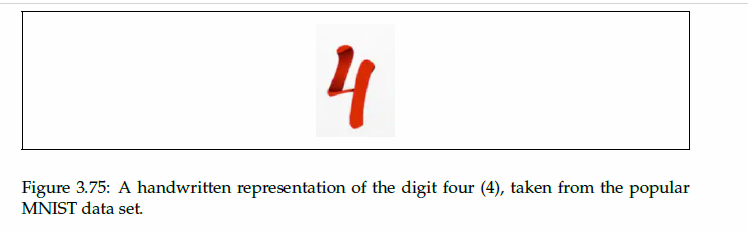

Este numero 4 se puede ver como 2 barras verticales y una horizontal. Se penaliza circulos en el proces, por ejemplo el numero 8 y el 0.

Recomiendo el video de

[Grant Sanderson](https://www.google.com/search?client=firefox-b-d&q=Grand+Sanderson+what+is+a+neural+network#fpstate=ive&vld=cid:cbc48356,vid:aircAruvnKk,st:0).
Para ver un poco sobre la intuicion de ANN (MLP) y el uso de la base de datos del MNIST (Modified National Institute of Standards).

Una muestra del MNIST esta en la Figura 3.73 y una muestra de la capa oculta es en la Figura 3.74

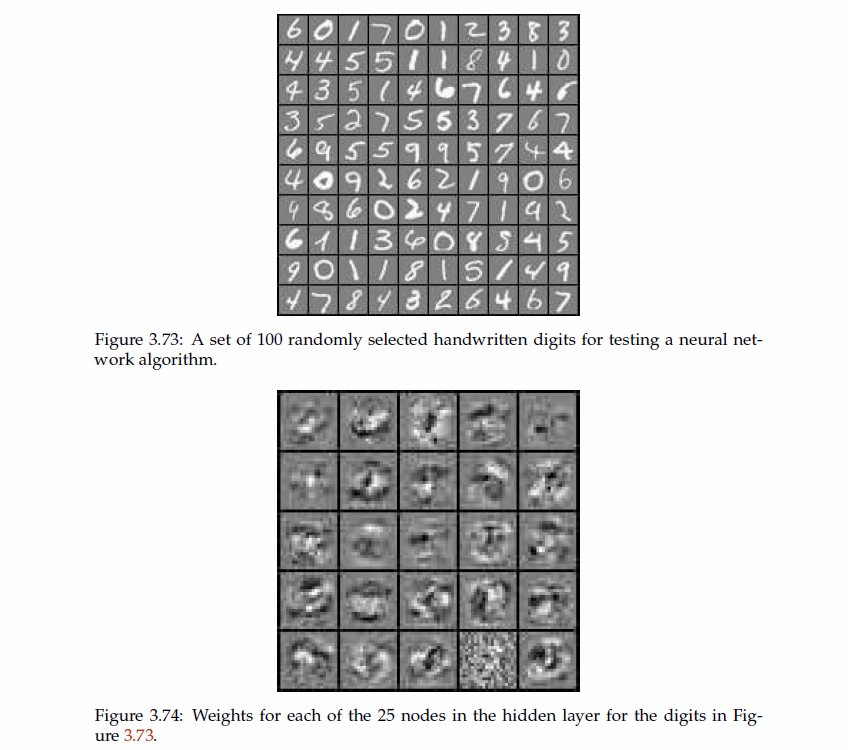

## Propagacion hacia atras (Backpropagation)
Este es el alma de las ANN.
Necesitamos dos elementos

1. La funcion de costo
2. El gradiente de la funcion de costo.
Si la funcion de costo es $J$, el gradiente es $\nabla J$
y el sistema se puede actualizar con la recursion


$$\Theta^{(i)} = \Theta^{(i-1)} - \alpha \nabla J(\Theta^{(i-1)}) \tag{1} $$

Recordemos la funcion de costo de la regresion logistica

$$J(\theta) = -\frac1m \sum_{i=1}^m y_i \log[ h(\theta, x^{(i)})] + (1 - y_i) \log [ 1 - h(\theta, x^{(i)})] +  \frac{\lambda}{2m} \sum_{j=1}^n \theta_i^2 $$

Generalizamos esta funcion de costo al caso de una ANN.

$$J(\Theta) =-\frac1m \sum_{i=1}^m \sum_{k=1}^K y_i^{(k)} \log [ h_k(\Theta, x^{(i)})] + (1 - y_i^{(k)}) \log [ (1 - h_k(\Theta, x^{(i)})] + \frac{\lambda}{2m} \sum_{\ell=1}^{L} \sum_{i=1}^{n_\ell} \sum_{j=1}^{n_{\ell+1}} (\Theta_{ij}^{(\ell)})^2 $$

Para resolver el problema de backpropagation necesitamos

* Propagacion hacia adelante hasta la ultima capa.
* Gradiente en la ultima capa.
* Gradiente en la penultima capa.
* Gradiente en la antepenultima y asi sucesivamente hasta la primera.
* Una vez se tiene el gradiente de todas las capas se puede actualizar $\Theta$
con la Ecuacion  (1).
* Si el resultado no es satisfactorio, se vuelve a hacer todo el proceso y esta seria la **epoca 2**.

### Propagacion hacia adelante
Vamos a sumir $L-1$ capas ocultas, una de entrada y una de salida

\begin{eqnarray}
A^{(1)} &=& X \\
A^{(2)} &=& S ( Z^{(2)}) = S( X \Theta^{(1)}) \\
A^{(3)} &=& S ( Z^{(3)}) = S( A^{(2)} \Theta^{(2)}) \\
&\vdots & \\
A^{(L-1)} &=& S ( Z^{(L-1)}) = S( A^{(L-2)} \Theta^{(L-2)}) \\
A^{(L)} &=& S ( Z^{(L)}) = S( A^{(L-1)} \Theta^{(L-1)}) \\
h(\Theta, X) &=& A^{(L+1)} = S ( Z^{(L+1)}) = S( A^{(L)} \Theta^{(L)}) \\
\end{eqnarray}

En ultima capa $\ell=L+1$:
No defino donde comienzan y acaban los indices.

$$ h(\Theta, X) = A^{(L+1)} = S ( Z^{(L+1)}) = S \Big ( \sum_k A_{ik}^{(L)} \Theta_{kj}^{(L)} \Big ) = S_{ij} $$

Recuerden la funcion de costo

$$J(\Theta) =-\frac1m \sum_{i=1}^m \sum_{j=1}^K y_i^{(j)} \log [ h_j(\Theta, x^{(i)})] + (1 - y_i^{(j)}) \log [ (1 - h_j(\Theta, x^{(i)})] + \frac{\lambda}{2m} \sum_{\ell=1}^{L} \sum_{i=1}^{n_\ell} \sum_{j=1}^{n_{\ell+1}} (\Theta_{ij}^{(\ell)})^2 \tag{2}. $$

Vamos a usar las siguientes herramientas:

1. $\frac{\partial \log S_{ij}}{\partial t}= \frac{1}{S_{ij}} \frac{\partial S_{ij}}{\partial t} $

2. $\frac{\partial \Theta_{ij}^{(k)}}{\partial \Theta_{pq}^{(r)}}=\delta_{kr} \delta_{ip} \delta_{jq} $

3. $\frac{\partial \Theta_{ij}^{(k)}}{\partial \Theta_{pq}^{(k)}}= \delta_{ip} \delta_{jq} $

4. $(S_{ij})' = S_{ij}(1- S_{ij})$.

La parte de regulaizacion la hago al final.
\begin{eqnarray}
\frac{\partial J(\Theta, X)}{\partial \Theta_{pq}^{(L)}} &=&
-\frac{1}{m} \sum_i \sum_j y_{ij} \frac{S_{ij}(1 - S_{ij})}{S_{ij}}
\left (  \sum_k A_{ik}^{(L)} \delta_{pk} \delta_{qj} \right )
+ \frac1m \sum_i \sum_j (1 - y_{ij}) \frac{S_{ij}(1-S_{ij})}{1 - S_{ij}}
\left (  \sum_k A_{ik}^{(L)} \delta_{pk} \delta_{qj} \right ) \\
&=& \sum_i -y_{iq} (1 - S_{iq}) A_{ip}^{(L)} + (1 - y_{iq}) S_{iq} A_{ip}^{(L)} \\
&=& \sum_i -y_{iq} A_{ip}^{(L)} + y_{iq} S_{iq} A_{ip}^{(L)} + S_{iq} A_{ip}^{(L)} - y_{iq} S_{iq} A_{ip}^{(L)} \\
&=& \sum_i \frac1m (S_{iq} - y_{iq}) A_{ip}^{(L)} \\
&=& \sum_i \frac1m (A_{iq}^{(L+1)} - y_{iq}) A_{ip}^{(L)} \\
&=&  \frac1m (A^{(L)})_p^T (A^{(L+1)} - Y)_q
\end{eqnarray}

El resultado es

$$ \frac{\partial J(\Theta, X)}{\partial \Theta_{pq}^{(L)}} =  \frac1m (A^{(L)})_p^T (A^{(L+1)} - Y)_q \tag{3} $$

Ahora debemos tomar la derivada con respecto a la capa anterior $\ell=L-1$.
Para esto observamos que

$$ h(\Theta, X) = A^{(L+1)} = S ( Z^{(L+1)}) = S \Big ( \sum_k A_{ik}^{(L)} \Theta_{kj}^{(L)} \Big ) = (S_{ij}) $$

$$ A_{ik}^{(L)} = S(Z_k^{(L)}) = S \Bigr   ( \sum_r A_{ir}^{(L-1)} \Theta_{rk}^{(L-1)}  \Bigr ) $$

Entonces, vamos a hacerlo por partes, primero la de $\log h$ y luego la de $\log (1-h)$

\begin{eqnarray}
\frac{\partial \log(h_{ij}(\Theta, X)) }{\partial \Theta_{pq}^{(L-1)} }
&=& \frac{S_{ij}(1-S_{ij})}{S_{ij}} \sum_k
\frac{\partial A_{ik}^{(L)}}{\Theta_{pq}^{(L-1)}} \Theta_{kj}^{(L)} \\
&=& (1 - A_{ij}^{(L+1)})
 \sum_k
\frac{\partial A_{ik}^{(L)}}{\Theta_{pq}^{(L-1)}} \Theta_{kj}^{(L)}  \tag{3a}
\end{eqnarray}

Encontremos explicitamente la derivada  $\frac{\partial A_{ik}^{(L)}}{\Theta_{pq}^{(L-1)}} $. Veamos

$$\frac{\partial A_{ik}^{(L)}}{\Theta_{pq}^{(L-1)}}= S_{ik}(1-S_{ik}) \sum_r
A_{ir}^{(L-1)} \delta_{rp} \delta_{kq} =A_{ik}^{(L)}(1 - A_{ik}^{(L)}) A_{ip}^{(L-1)} \delta_{kq} \tag{4}$$
Insertamos $(4)$ en  (3a) y obtenemos

$$ \frac{\partial \log(h_{ij}(\Theta, X)) }{\partial \Theta_{pq}^{(L-1)} } = (1 - A_{ij})^{(L+1)} ( A_{iq}^{(L)} (1 - A_{iq}^{(L)}) A_{ip}^{(L-1)} \Theta_{qj}^{(L)} ) \tag{5} $$

De igual forma la derivada de la parte $\log (1 - h)$.

\begin{eqnarray}
\frac{\log(1 - h_{ij}(\Theta, X))}{\partial \Theta_{pq}^{(L-1)}}
&=& -\frac{S_{ij}(1-S_{ij})}{1 -S_{ij}}
 \sum_k
\frac{\partial A_{ik}^{(L)}}{\Theta_{pq}^{(L-1)}} \Theta_{kj}^{(L)}  \\
&=&-A_{ij}^{(L+1)}
( A_{iq}^{(L)} (1 - A_{iq}^{(L)}) A_{ip}^{(L-1)} \Theta_{qj}^{(L)} )
\tag{6}
\end{eqnarray}

Ahora juntamos el trabajo de  (5) y (6).

$$y_{ij} \frac{\partial \log(h_{ij}(\Theta, X)) }{\partial \Theta_{pq}^{(L-1)} } + (1 - y_{ij}) \frac{\log(1 - h_{ij}(\Theta, X))}{\partial \Theta_{pq}^{(L-1)}} =
( A_{iq}^{(L)} (1 - A_{iq}^{(L)}) A_{ip}^{(L-1)} \Theta_{qj}^{(L)} ) [ y_{ij}(1 - A_{ij}^{(L+1)}) - (1 - y_{ij})A_{ij}^{(L+1})
=
( A_{iq}^{(L)} (1 - A_{iq}^{(L)}) A_{ip}^{(L-1)} \Theta_{qj}^{(L)} )
[y_{ij} - y_{ij} A_{ij}^{(L+1)} -   A_{ij}^{(L+1)} + y_{ij}A_{ij}^{(L+1}]
= (y_{ij} - A_{ij}^{(L+1)})
( A_{iq}^{(L)} (1 - A_{iq}^{(L)}) A_{ip}^{(L-1)} \Theta_{qj}^{(L)} )   $$





Entonces, la funcion de costo quedsa


\begin{eqnarray}
\frac{\partial J(\Theta, X)}{\partial \Theta_{pq}^{(L-1)}} &=&
\frac1m \sum_i \sum_j  (A_{ij}^{(L+1)}- y_{ij})
( A_{iq}^{(L)} (1 - A_{iq}^{(L)}) A_{ip}^{(L-1)} \Theta_{qj}^{(L)} ) \\
&=& \sum_i A_{iq}^{(L)} (1 - A_{iq}^{(L)}) A_{ip}^{(L-1)}
\sum_j(A_{ij}^{(L+1)} - y_{ij}) \Theta_{qj}^{L} \\
&=& \frac1m \sum_i  A_{iq}^{(L)}(1 - A_{iq}^{(L)}) A_{ip}^{(L-1)} [(A^{(L+1)} - Y) (\Theta^{(L)})^T]_{iq} \\
&=& \frac1m \sum_i A_{ip}^{(L-1)}  [(A^{(L+1)} - Y) (\Theta^{(L)})^T]_{iq} A_{iq}^{(L)} (1 - A_{iq}^{(L)}) \\
&=& \frac1m \sum_i A_{ip}^{(L-1)}  [(A^{(L+1)} - Y) (\Theta^{(L)})^T]_{iq}
[ A^{(L)} \circ (1 - A^{(L)}]_{iq} \\
&=& \frac1m [(A^{(L-1)})^T]_p   [ (A^{(L+1)} - Y) (\Theta^{(L)})^T
 A^{(L)} \circ (1 - A^{(L)}]_{q}
\end{eqnarray}

Ahora que pasa si vamos a $\ell = L-2, L-3, \cdots , 1$
Tenemos de la misma forma

$$ \frac{\partial J(\Theta, X)}{\partial \Theta_{pq}^{(\ell)}}
= \frac1m [(A^{(\ell)})^T]_p   [ (A^{(\ell+2)} - Y) (\Theta^{(\ell+1)})^T
 A^{(\ell+1)} \circ (1 - A^{(\ell+1)}]_{q}.
$$

El algoritmo queda como sigue

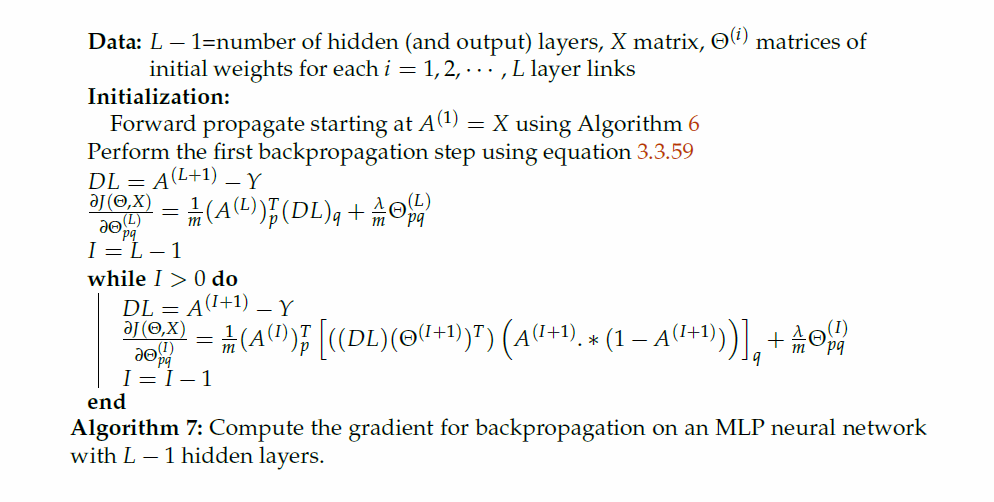

La parte de regularizacion

$$
 R =\frac{\lambda}{2m} \sum_{\ell=1}^{L} \sum_{i=1}^{n_\ell} \sum_{j=1}^{n_{\ell+1}} (\Theta_{ij}^{(\ell)})^2 \tag{2}. $$

 $$ \frac{\partial R}{\Theta_{pq}^m}  = \frac{\lambda}{m} \sum_{\ell=1}^{L} \sum_{i=1}^{n_\ell} \sum_{j=1}^{n_{\ell+1}}  \delta_{ip} \delta_{jq} \delta_{\ell m} \Theta_{ij}^{\ell} = \frac{\lambda}{m} \Theta_{pq}^{m}
 $$